In [12]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [13]:
df = pd.read_csv('path.csv')

df['part'] = df[' distance / mm'].diff()
df.loc[0,'part'] = df.loc[0, ' distance / mm']

df['Δx'] = - df['part'] * np.sin(- df[' angle / °'] * np.pi/180)
df['Δy'] =   df['part'] * np.cos(- df[' angle / °'] * np.pi/180)

df['x'] = df['Δx'].cumsum()
df['y'] = df['Δy'].cumsum()

df

,time / s,distance / mm,angle / °,part,Δx,Δy,x,y
0,10.937,741,0,741.0,-0.000000,741.000000,-0.000000,741.000000
1,29.738,2010,157,1269.0,495.837802,-1168.120659,495.837802,-427.120659
2,39.206,2396,263,386.0,-383.122815,-47.041567,112.714988,-474.162226
3,45.006,2475,316,79.0,-54.878011,56.827844,57.836976,-417.334381
4,47.820,2425,363,-50.0,-2.616798,-49.931477,55.220178,-467.265858
5,55.587,2586,524,161.0,44.377614,-154.763133,99.597793,-622.028991


(-24.791890102644444, 520.6296921555333, -690.1804406997069, 809.1514495571289)

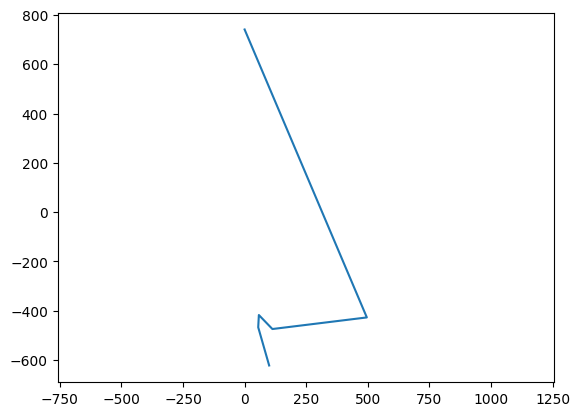

In [14]:
plt.plot(df['x'],df['y'])
plt.axis('equal')